In [10]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt

Build the Avg_Salary_By_Discipline table

In [11]:
!cat 2015Avg.txt










Humanities $45,042 58

In [111]:
#extract category names as dictionary keys

def parse_avg_salary_data(filename):
    '''

    DO THE DOCSTRING

    '''
    avg_lst = []
    avg_dict = {}
    avg_dict['Year'] = filename[:4]
    regpat = '^[0-9]+,[0-9]+'

    with open(filename, 'r') as f:
        lines = f.readlines()
        for line in lines: 
            avg_lst.append(line.split('$'))

    for i in range (1,len(avg_lst)):
        salary = avg_lst[i][1]
        salary = int(re.search(regpat,salary).group(0).replace(',',''))
        avg_dict[avg_lst[i][0].strip().upper().replace(' ','_')] = salary    
    
    return avg_dict

In [112]:
#generate a list of file names
#call function above to return a dictionary for each, then append values
def get_avg_salary_data(years):
    '''
    
    DO THE DOCSTRING
    
    '''
    avg_salary_by_cat = {}

    #calls function to parse salary data for years provided
    for year in years:
        filename = year+'Avg.txt'
        temp_dict = parse_avg_salary_data(filename)

        #generates master dictionary
        for key, value in temp_dict.items():
            if key not in avg_salary_by_cat:
                avg_salary_by_cat[key] = [value]
            else:
                avg_salary_by_cat[key].append(value)

    #eliminates keys (categories) with insufficient reporting data
    keys_to_remove = []
    for key,value in avg_salary_by_cat.items():
        if len(value) < 8: keys_to_remove.append(key)
    for keys in keys_to_remove:
        avg_salary_by_cat.pop(keys)
        


    return avg_salary_by_cat


In [126]:
#call the function to generate table of average salaries for each main reporting category
years = ['2015','2016','2017','2018','2019','2020','2021','2022']
avg_salary_by_cat = get_avg_salary_data(years)
avg_salary_cat = pd.DataFrame(avg_salary_by_cat)
avg_salary_cat


,Year,ENGINEERING,COMPUTER_SCIENCE,MATH_&_SCIENCES,BUSINESS,AGRICULTURE_&_NATURAL_RESOURCES,COMMUNICATIONS,SOCIAL_SCIENCES,HUMANITIES
0,2015,62998,61287,56171,51508,51220,49395,49047,45042
1,2016,64891,61321,55087,52236,48729,47047,46585,46065
2,2017,66097,65540,59368,54803,54364,51925,53459,48733
3,2018,66521,66005,61867,56720,53565,51448,56689,56688
4,2019,69188,67539,62177,57657,55750,52056,57310,56651
5,2020,69961,67411,62488,57939,53504,56484,57425,53617
6,2021,71088,72173,63316,58869,54857,58174,59919,59500
7,2022,73922,75900,66760,60695,57807,55455,61173,50681


In [127]:
#calculates y/y percent change in salaries by category
avg_salary_cat_change = avg_salary_cat.iloc[:,1:].pct_change()

col_years = years.copy()
for i in range(len(col_years)):
    col_years[i] += '_pct_change'
col_years.insert(0,'Category')

avg_salary_cat_change = avg_salary_cat_change.T.reset_index()
avg_salary_cat_change.columns = col_years

avg_salary_cat_change

,Category,2015_pct_change,2016_pct_change,2017_pct_change,2018_pct_change,2019_pct_change,2020_pct_change,2021_pct_change,2022_pct_change
0,ENGINEERING,NaN,0.030049,0.018585,0.006415,0.040093,0.011172,0.016109,0.039866
1,COMPUTER_SCIENCE,NaN,0.000555,0.068802,0.007095,0.023241,-0.001895,0.070641,0.051640
2,MATH_&_SCIENCES,NaN,-0.019298,0.077713,0.042093,0.005011,0.005002,0.013251,0.054394
3,BUSINESS,NaN,0.014134,0.049142,0.034980,0.016520,0.004891,0.016051,0.031018
4,AGRICULTURE_&_NATURAL_RESOURCES,NaN,-0.048633,0.115640,-0.014697,0.040792,-0.040287,0.025288,0.053776
5,COMMUNICATIONS,NaN,-0.047535,0.103684,-0.009186,0.011818,0.085062,0.029920,-0.046739
6,SOCIAL_SCIENCES,NaN,-0.050197,0.147558,0.060420,0.010955,0.002007,0.043431,0.020928
7,HUMANITIES,NaN,0.022712,0.057918,0.163236,-0.000653,-0.053556,0.109723,-0.148218


In [128]:
#reads degree popularity data from CSV and creates dataframe
degrees_by_cat = pd.read_csv('Degrees_By_Cat.csv')
degrees_by_cat.Category=degrees_by_cat.Category.apply(lambda x: x.upper())
degrees_by_cat

,Category,2015_degrees,2016_degrees,2017_degrees,2018_degrees,2019_degrees,2020_degrees,2021_degrees,2022_degrees,2015_rel_pop,2016_rel_pop,2017_rel_pop,2018_rel_pop,2019_rel_pop,2020_rel_pop,2021_rel_pop,2022_rel_pop
0,AGRICULTURE_&_NATURAL_RESOURCES,36278,36995,37734,39317,40458,NaN,NaN,NaN,0.019,0.019,0.019,0.020,0.020,NaN,NaN,NaN
1,BUSINESS,363741,371690,381109,386240,390564,NaN,NaN,NaN,0.192,0.194,0.195,0.195,0.194,NaN,NaN,NaN
2,COMMUNICATIONS,95793,97375,98409,96520,96972,NaN,NaN,NaN,0.051,0.051,0.050,0.049,0.048,NaN,NaN,NaN
3,COMPUTER_SCIENCE,59586,64402,71416,79597,88633,NaN,NaN,NaN,0.031,0.034,0.037,0.040,0.044,NaN,NaN,NaN
4,ENGINEERING,97852,106789,115671,121953,126687,NaN,NaN,NaN,0.052,0.056,0.059,0.062,0.063,NaN,NaN,NaN
5,HUMANITIES,223687,215876,211782,207048,207218,NaN,NaN,NaN,0.118,0.112,0.108,0.105,0.103,NaN,NaN,NaN
6,SOCIAL_SCIENCES,343492,338480,336497,336392,336303,NaN,NaN,NaN,0.181,0.176,0.172,0.170,0.167,NaN,NaN,NaN
7,MATH_&_SCIENCES,170890,175880,180694,183920,187291,NaN,NaN,NaN,0.090,0.092,0.092,0.093,0.093,NaN,NaN,NaN


In [134]:
#transpose and reformat table for merging by category
col_years = years.copy()
for i in range(len(col_years)):
    col_years[i] += '_avg_sal'
col_years.insert(0,'Category')
    
avg_salary_cat = avg_salary_cat.iloc[:,1:].T.reset_index()
avg_salary_cat.columns=col_years
avg_salary_cat

,Category,2015_avg_sal,2016_avg_sal,2017_avg_sal,2018_avg_sal,2019_avg_sal,2020_avg_sal,2021_avg_sal,2022_avg_sal
0,ENGINEERING,62998,64891,66097,66521,69188,69961,71088,73922
1,COMPUTER_SCIENCE,61287,61321,65540,66005,67539,67411,72173,75900
2,MATH_&_SCIENCES,56171,55087,59368,61867,62177,62488,63316,66760
3,BUSINESS,51508,52236,54803,56720,57657,57939,58869,60695
4,AGRICULTURE_&_NATURAL_RESOURCES,51220,48729,54364,53565,55750,53504,54857,57807
5,COMMUNICATIONS,49395,47047,51925,51448,52056,56484,58174,55455
6,SOCIAL_SCIENCES,49047,46585,53459,56689,57310,57425,59919,61173
7,HUMANITIES,45042,46065,48733,56688,56651,53617,59500,50681


In [137]:
#merge dataframes
data = avg_salary_cat.merge(avg_salary_cat_change, on='Category').merge(degrees_by_cat, on='Category')
data

,Category,2015_avg_sal,2016_avg_sal,2017_avg_sal,2018_avg_sal,2019_avg_sal,2020_avg_sal,2021_avg_sal,2022_avg_sal,2015_pct_change,...,2021_degrees,2022_degrees,2015_rel_pop,2016_rel_pop,2017_rel_pop,2018_rel_pop,2019_rel_pop,2020_rel_pop,2021_rel_pop,2022_rel_pop
0,ENGINEERING,62998,64891,66097,66521,69188,69961,71088,73922,NaN,...,NaN,NaN,0.052,0.056,0.059,0.062,0.063,NaN,NaN,NaN
1,COMPUTER_SCIENCE,61287,61321,65540,66005,67539,67411,72173,75900,NaN,...,NaN,NaN,0.031,0.034,0.037,0.040,0.044,NaN,NaN,NaN
2,MATH_&_SCIENCES,56171,55087,59368,61867,62177,62488,63316,66760,NaN,...,NaN,NaN,0.090,0.092,0.092,0.093,0.093,NaN,NaN,NaN
3,BUSINESS,51508,52236,54803,56720,57657,57939,58869,60695,NaN,...,NaN,NaN,0.192,0.194,0.195,0.195,0.194,NaN,NaN,NaN
4,AGRICULTURE_&_NATURAL_RESOURCES,51220,48729,54364,53565,55750,53504,54857,57807,NaN,...,NaN,NaN,0.019,0.019,0.019,0.020,0.020,NaN,NaN,NaN
5,COMMUNICATIONS,49395,47047,51925,51448,52056,56484,58174,55455,NaN,...,NaN,NaN,0.051,0.051,0.050,0.049,0.048,NaN,NaN,NaN
6,SOCIAL_SCIENCES,49047,46585,53459,56689,57310,57425,59919,61173,NaN,...,NaN,NaN,0.181,0.176,0.172,0.170,0.167,NaN,NaN,NaN
7,HUMANITIES,45042,46065,48733,56688,56651,53617,59500,50681,NaN,...,NaN,NaN,0.118,0.112,0.108,0.105,0.103,NaN,NaN,NaN


In [138]:
#creates a copy of the dataframe for further manipulation
#reformats for analysis (needed categories as column for merge)
data2 = data.copy().T
categories = data2.iloc[0]
data2.columns = categories
data2 = data2.iloc[1:]
data2

Category,ENGINEERING,COMPUTER_SCIENCE,MATH_&_SCIENCES,BUSINESS,AGRICULTURE_&_NATURAL_RESOURCES,COMMUNICATIONS,SOCIAL_SCIENCES,HUMANITIES
2015_avg_sal,62998,61287,56171,51508,51220,49395,49047,45042
2016_avg_sal,64891,61321,55087,52236,48729,47047,46585,46065
2017_avg_sal,66097,65540,59368,54803,54364,51925,53459,48733
2018_avg_sal,66521,66005,61867,56720,53565,51448,56689,56688
2019_avg_sal,69188,67539,62177,57657,55750,52056,57310,56651
2020_avg_sal,69961,67411,62488,57939,53504,56484,57425,53617
2021_avg_sal,71088,72173,63316,58869,54857,58174,59919,59500
2022_avg_sal,73922,75900,66760,60695,57807,55455,61173,50681
2015_pct_change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016_pct_change,0.030049,0.000555,-0.019298,0.014134,-0.048633,-0.047535,-0.050197,0.022712


In [141]:
popdata = data2.iloc[24:29]
popdata

Category,ENGINEERING,COMPUTER_SCIENCE,MATH_&_SCIENCES,BUSINESS,AGRICULTURE_&_NATURAL_RESOURCES,COMMUNICATIONS,SOCIAL_SCIENCES,HUMANITIES
2015_rel_pop,0.052,0.031,0.09,0.192,0.019,0.051,0.181,0.118
2016_rel_pop,0.056,0.034,0.092,0.194,0.019,0.051,0.176,0.112
2017_rel_pop,0.059,0.037,0.092,0.195,0.019,0.05,0.172,0.108
2018_rel_pop,0.062,0.04,0.093,0.195,0.02,0.049,0.17,0.105
2019_rel_pop,0.063,0.044,0.093,0.194,0.02,0.048,0.167,0.103


In [142]:
saldata = data2.iloc[0:5]
saldata

Category,ENGINEERING,COMPUTER_SCIENCE,MATH_&_SCIENCES,BUSINESS,AGRICULTURE_&_NATURAL_RESOURCES,COMMUNICATIONS,SOCIAL_SCIENCES,HUMANITIES
2015_avg_sal,62998,61287,56171,51508,51220,49395,49047,45042
2016_avg_sal,64891,61321,55087,52236,48729,47047,46585,46065
2017_avg_sal,66097,65540,59368,54803,54364,51925,53459,48733
2018_avg_sal,66521,66005,61867,56720,53565,51448,56689,56688
2019_avg_sal,69188,67539,62177,57657,55750,52056,57310,56651


In [145]:
salchangedata = data2.iloc[8:13]
salchangedata

Category,ENGINEERING,COMPUTER_SCIENCE,MATH_&_SCIENCES,BUSINESS,AGRICULTURE_&_NATURAL_RESOURCES,COMMUNICATIONS,SOCIAL_SCIENCES,HUMANITIES
2015_pct_change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016_pct_change,0.030049,0.000555,-0.019298,0.014134,-0.048633,-0.047535,-0.050197,0.022712
2017_pct_change,0.018585,0.068802,0.077713,0.049142,0.11564,0.103684,0.147558,0.057918
2018_pct_change,0.006415,0.007095,0.042093,0.03498,-0.014697,-0.009186,0.06042,0.163236
2019_pct_change,0.040093,0.023241,0.005011,0.01652,0.040792,0.011818,0.010955,-0.000653


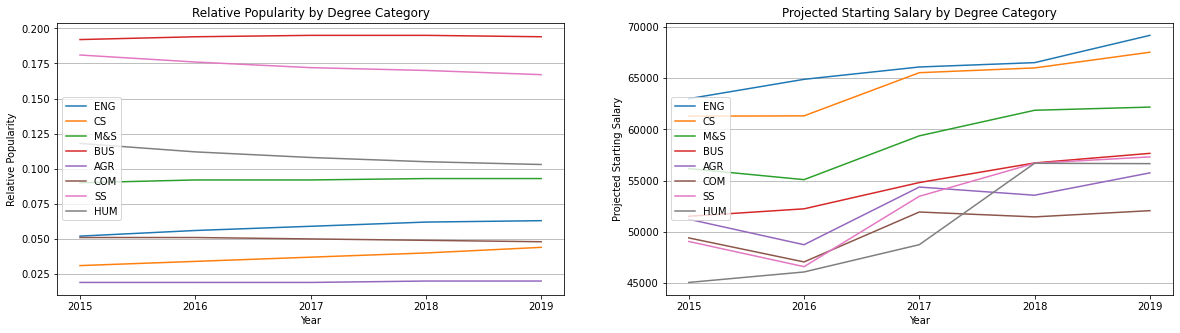

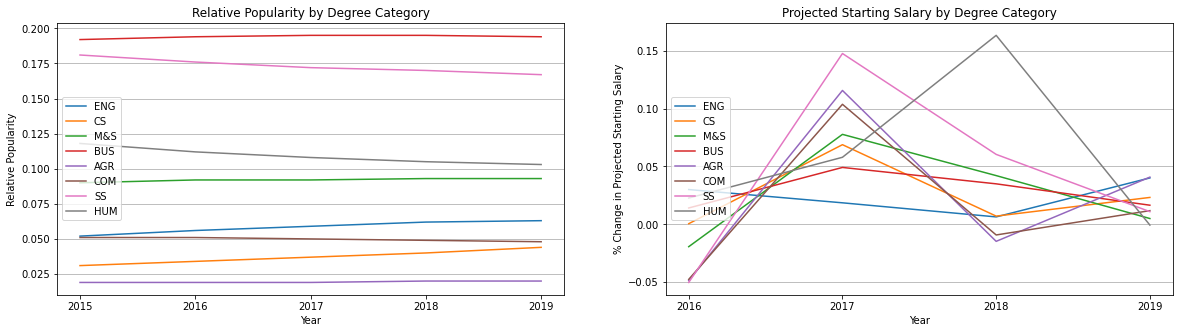

In [157]:
xvalues=range(5)

#build first set of graphs
plt.figure(figsize =(20,5))
ax = plt.subplot(1,2,1)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2015','2016','2017','2018','2019'])
plt.plot(xvalues,popdata['ENGINEERING'])
plt.plot(xvalues,popdata['COMPUTER_SCIENCE'])
plt.plot(xvalues,popdata['MATH_&_SCIENCES'])
plt.plot(xvalues,popdata['BUSINESS'])
plt.plot(xvalues,popdata['AGRICULTURE_&_NATURAL_RESOURCES'])
plt.plot(xvalues,popdata['COMMUNICATIONS'])
plt.plot(xvalues,popdata['SOCIAL_SCIENCES'])
plt.plot(xvalues,popdata['HUMANITIES'])
plt.legend(['ENG','CS','M&S','BUS','AGR','COM','SS','HUM'],loc=6)
plt.xlabel('Year')
plt.ylabel('Relative Popularity')
plt.title('Relative Popularity by Degree Category')
plt.grid(b=True, which='major',axis='y')

ax = plt.subplot(1,2,2)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2015','2016','2017','2018','2019'])
plt.plot(xvalues,saldata['ENGINEERING'])
plt.plot(xvalues,saldata['COMPUTER_SCIENCE'])
plt.plot(xvalues,saldata['MATH_&_SCIENCES'])
plt.plot(xvalues,saldata['BUSINESS'])
plt.plot(xvalues,saldata['AGRICULTURE_&_NATURAL_RESOURCES'])
plt.plot(xvalues,saldata['COMMUNICATIONS'])
plt.plot(xvalues,saldata['SOCIAL_SCIENCES'])
plt.plot(xvalues,saldata['HUMANITIES'])
plt.legend(['ENG','CS','M&S','BUS','AGR','COM','SS','HUM'],loc=6)
plt.xlabel('Year')
plt.ylabel('Projected Starting Salary')
plt.title('Projected Starting Salary by Degree Category')
plt.grid(b=True, which='major',axis='y')
plt.show()


#build second set of graphs
plt.figure(figsize =(20,5))
ax = plt.subplot(1,2,1)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2015','2016','2017','2018','2019'])
plt.plot(xvalues,popdata['ENGINEERING'])
plt.plot(xvalues,popdata['COMPUTER_SCIENCE'])
plt.plot(xvalues,popdata['MATH_&_SCIENCES'])
plt.plot(xvalues,popdata['BUSINESS'])
plt.plot(xvalues,popdata['AGRICULTURE_&_NATURAL_RESOURCES'])
plt.plot(xvalues,popdata['COMMUNICATIONS'])
plt.plot(xvalues,popdata['SOCIAL_SCIENCES'])
plt.plot(xvalues,popdata['HUMANITIES'])
plt.legend(['ENG','CS','M&S','BUS','AGR','COM','SS','HUM'],loc=6)
plt.xlabel('Year')
plt.ylabel('Relative Popularity')
plt.title('Relative Popularity by Degree Category')
plt.grid(b=True, which='major',axis='y')

ax = plt.subplot(1,2,2)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2015','2016','2017','2018','2019'])
plt.plot(xvalues,salchangedata['ENGINEERING'])
plt.plot(xvalues,salchangedata['COMPUTER_SCIENCE'])
plt.plot(xvalues,salchangedata['MATH_&_SCIENCES'])
plt.plot(xvalues,salchangedata['BUSINESS'])
plt.plot(xvalues,salchangedata['AGRICULTURE_&_NATURAL_RESOURCES'])
plt.plot(xvalues,salchangedata['COMMUNICATIONS'])
plt.plot(xvalues,salchangedata['SOCIAL_SCIENCES'])
plt.plot(xvalues,salchangedata['HUMANITIES'])
plt.legend(['ENG','CS','M&S','BUS','AGR','COM','SS','HUM'],loc=6)
plt.xlabel('Year')
plt.ylabel('% Change in Projected Starting Salary')
plt.title('Projected Starting Salary by Degree Category')
plt.grid(b=True, which='major',axis='y')
plt.show()


In [ ]:
#